In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
import pydot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [ ]:
train = pd.read_csv('trainPrepDone.csv')
test = pd.read_csv('testPrepDone.csv')
testResults = pd.read_csv('trueResults.csv')

In [13]:
train = train.fillna(0)
test = test.fillna(0)
#train = train.drop('id', axis = 1)
#test = test.drop('id', axis = 1)

In [14]:
train['culmative_workers_success'] = train.apply(lambda row: row.director_success + row.producer_success + row.actor1_success + row.actor2_success, axis = 1)
test['culmative_workers_success'] = test.apply(lambda row: row.director_success + row.producer_success + row.actor1_success + row.actor2_success, axis = 1)

In [17]:
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]
test = test.join(testResults)


In [19]:
indexNames = test[ test['revenue'] == 0 ].index
# Delete these row indexes from dataFrame
test.drop(indexNames , inplace=True)

indexNames = train[ train['revenue'] == 1 ].index
# Delete these row indexes from dataFrame
train.drop(indexNames , inplace=True)

In [20]:
test

,id,budget,popularity,runtime,has_collection,release_year,director_success,producer_success,actor1_success,actor2_success,...,Action,Mystery,Foreign,Science Fiction,Documentary,Family,adjusted_budget,culmative_workers_success,Unnamed: 0,revenue
0,3001,0,3.851534,90.0,1,2007,5.759603e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0,0,0,0,0,1,480672.1,5.759603e+07,0,42538454
1,3002,88000,3.559789,65.0,0,1958,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0,0,0,1,0,0,88000.0,0.000000e+00,1,480000
2,3003,0,8.085194,100.0,0,1997,0.000000e+00,0.000000e+00,8.120991e+07,1.598942e+08,...,0,0,0,0,0,0,480672.1,2.411042e+08,2,34673095
4,3005,2000000,3.217680,92.0,0,2005,7.428980e+05,2.500000e+05,3.708505e+06,0.000000e+00,...,0,0,0,0,1,0,2000000.0,4.701403e+06,4,653621
5,3006,0,8.679350,121.0,0,1996,4.509481e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0,0,0,0,0,0,480672.1,4.509481e+06,5,656747
6,3007,0,4.898882,119.0,0,2010,2.247633e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0,0,0,0,0,0,480672.1,2.247633e+07,6,2611555
7,3008,30000000,7.023414,77.0,0,2000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0,0,0,0,0,1,30000000.0,0.000000e+00,7,45554533
8,3009,16500000,7.829737,120.0,0,2007,0.000000e+00,6.841808e+07,6.302956e+07,1.535518e+08,...,0,0,0,0,0,0,16500000.0,2.849994e+08,8,37311672
9,3010,90000000,17.547693,92.0,1,1999,1.867770e+08,0.000000e+00,2.101818e+08,1.005821e+08,...,0,0,0,0,0,1,90000000.0,4.975409e+08,9,497366869
10,3011,2000000,0.262437,88.0,0,2005,0.000000e+00,0.000000e+00,1.175574e+07,0.000000e+00,...,0,0,0,0,0,0,2000000.0,1.175574e+07,10,16344


In [21]:
del testResults
testResults = pd.DataFrame()
testResults['revenue'] = test['revenue']

In [22]:
test = test.drop(['id', 'revenue'], axis=1)

In [23]:
train_rev_labels = np.array(train['revenue'])

In [24]:
test_labels = np.array(testResults['revenue'])

In [25]:
train_panda_labels = train['revenue']
train_panda_features = train.drop((['revenue']), axis = 1)

#train_list = list(train.columns)
#test_list = list(test.columns)

In [26]:
#remove unnamed
train_panda_features = train_panda_features.loc[:, ~train_panda_features.columns.str.contains('^Unnamed')]
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

In [27]:
train_panda_features.fillna(0)
test.fillna(0)
train_features  = np.array(train_panda_features)
test_features = np.array(test)

In [28]:
train_panda_features = train_panda_features.drop(['budget'], axis = 1)

Test Combined Success over seperate success

In [29]:
train_features_mod2  = train_panda_features
test_features_mod2 = test.drop('budget', axis = 1)
train_features_mod2['culmative_workers_success'] = train.apply(lambda row: row.director_success + row.producer_success + row.actor1_success + row.actor2_success, axis = 1)
test_features_mod2['culmative_workers_success'] = test.apply(lambda row: row.director_success + row.producer_success + row.actor1_success + row.actor2_success, axis = 1)

train_features_mod2 = train_features_mod2.drop((['director_success', 'producer_success', 'actor1_success', 'actor2_success']), axis = 1)
test_features_mod2 = test_features_mod2.drop((['director_success', 'producer_success', 'actor1_success', 'actor2_success']), axis = 1)


In [30]:
train_features = np.array(train_panda_features)
test_features = np.array(test.drop('budget', axis = 1).fillna(0))

train_features_mod2np = np.array(train_features_mod2)
test_features_mod2np = np.array(test_features_mod2)

## Test accuracy/importance of features

Test Performance of only year and adjusted budget

In [31]:
train_budget_year_only = pd.DataFrame() 
train_budget_year_only['budget'] = train['budget']
train_budget_year_only['release_year'] = train['release_year']

test_budget_year_only = pd.DataFrame() 

test_budget_year_only['budget'] = test['budget']
test_budget_year_only['release_year'] = test['release_year']


In [32]:
lm_by = linear_model.LinearRegression()
lin_model_by = lm_by.fit(train_budget_year_only, train['revenue'])
lin_predictions_by = lm_by.predict(test_budget_year_only)
lin_predictions_by[lin_predictions_by < 0] = 0

In [33]:
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_by)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_by)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_by)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_by)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_by)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_by)))

Mean abs error 46810215.641301334
Median abs error 17001121.360678434
explained_variance_score 0.5659008835516366
mean_squared_error 9831100555462478.0
mean_squared_log_error 13.888614349074091
r2_score 0.5652911088120773


end Test Performance of only year and adjusted budget

In [34]:
train_byp = train_budget_year_only.copy()
test_byp = test_budget_year_only.copy()
train_byp['popularity'] = train['popularity']
test_byp['popularity'] = test['popularity']

In [35]:
lm_byp = linear_model.LinearRegression()
lin_model_byp = lm_byp.fit(train_byp, train['revenue'])
lin_predictions_byp = lm_byp.predict(test_byp)
lin_predictions_byp[lin_predictions_byp < 0] = 0

In [36]:
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_byp)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_byp)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_byp)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_byp)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_byp)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_byp)))

Mean abs error 45400926.07457126
Median abs error 18331355.591246247
explained_variance_score 0.5943355574556771
mean_squared_error 9177980261435162.0
mean_squared_log_error 40.468706069462996
r2_score 0.594170601726143


#### negligible/questionable gains from popularity -> drop it

In [37]:
train_byc = train_budget_year_only.copy()
test_byc = test_budget_year_only.copy()

train_byc['culmative_workers_success'] = train['culmative_workers_success']
test_byc['culmative_workers_success'] = test['culmative_workers_success']

In [38]:
lm_byc = linear_model.LinearRegression()
lin_model_byc = lm_byc.fit(train_byc, train['revenue'])
lin_predictions_byc = lm_byc.predict(test_byc)
lin_predictions_byc[lin_predictions_byc < 0] = 0

print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_byc)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_byc)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_byc)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_byc)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_byc)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_byc)))

Mean abs error 46321614.71661736
Median abs error 18384023.356963992
explained_variance_score 0.5633439601391457
mean_squared_error 9894480929049294.0
mean_squared_log_error 43.9180379158054
r2_score 0.5624885729444433


In [ ]:
# questionable performance again, better than popularity but not by much -> keeping is questionable

In [39]:
train_byw = train_budget_year_only.copy()
test_byw = test_budget_year_only.copy()

train_byw[['director_success', 'producer_success', 'actor1_success', 'actor2_success']] = train[['director_success', 'producer_success', 'actor1_success', 'actor2_success']]
test_byw[['director_success', 'producer_success', 'actor1_success', 'actor2_success']] = test[['director_success', 'producer_success', 'actor1_success', 'actor2_success']]

In [40]:

train_budget_year_only.head()

,budget,release_year
0,14000000,2015
1,40000000,2004
2,3300000,2014
3,1200000,2012
4,0,2009


In [41]:
lm_byw = linear_model.LinearRegression()
lin_model_byw = lm_byw.fit(train_byw, train['revenue'])
lin_predictions_byw = lm_byw.predict(test_byw)
lin_predictions_byw[lin_predictions_byw < 0] = 0

print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_byw)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_byw)))

Mean abs error 45899503.39112625
Median abs error 17937841.276986957
explained_variance_score 0.5632591895158113
mean_squared_error 9900656599126372.0
mean_squared_log_error 42.01047211997656
r2_score 0.5622154988693279


In [42]:
lm_byw = linear_model.LinearRegression()
lin_model_byw = lm_byw.fit(train_byw.drop(['release_year'], axis=1), train['revenue'])
lin_predictions_byw = lm_byw.predict(test_byw.drop(['release_year'], axis = 1))
lin_predictions_byw[lin_predictions_byw < 0] = 0

print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_byw)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_byw)))

Mean abs error 45684994.88183212
Median abs error 18159944.233718224
explained_variance_score 0.5692665476402287
mean_squared_error 9771531852807722.0
mean_squared_log_error 44.66467863050269
r2_score 0.5679251012663773


In [62]:
lm_byw = linear_model.LinearRegression()
lin_model_byw = lm_byw.fit(train.drop(['release_year'], axis=1), train['revenue'])
lin_predictions_byw = lm_byw.predict(test.drop(['release_year'], axis = 1))
lin_predictions_byw[lin_predictions_byw < 0] = 0

print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_byw)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_byw)))

ValueError: shapes (2953,23) and (27,) not aligned: 23 (dim 1) != 27 (dim 0)

In [43]:
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_byw)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_byw)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_byw)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_byw)))

Mean abs error 45684994.88183212
Median abs error 18159944.233718224
explained_variance_score 0.5692665476402287
mean_squared_error 9771531852807722.0
mean_squared_log_error 44.66467863050269
r2_score 0.5679251012663773


dropping release_year leads to performance gains -> attempt to get inflation data (CPI) to replace release_year

### Replace release_year with CPI for that year

In [45]:
import csv
with open('dsfinal/inflation.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('dsfinal/idkwhythis.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        year_to_cpi = {int(rows[0]):rows[1] for rows in reader}

FileNotFoundError: [Errno 2] No such file or directory: 'inflation.csv'

In [48]:
def inflation_for_year(year):
    if year in year_to_cpi.keys():
         return float(year_to_cpi[year])
    else:
 
        return float(year_to_cpi[1947])

In [49]:
trainCPIS = train.apply(lambda row: inflation_for_year(int(row.release_year)), axis = 1)
testCPIS = test.apply(lambda row: inflation_for_year(int(row.release_year)), axis = 1)

NameError: ("name 'year_to_cpi' is not defined", 'occurred at index 0')

In [356]:
train['market_ratio_to_2018'] = train.apply(lambda row: row.cpi_on_release_year/249.498, axis = 1)
test['market_ratio_to_2018'] = test.apply(lambda row: row.cpi_on_release_year/249.498, axis = 1)

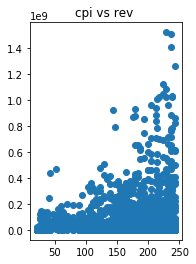

In [376]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 2)

plt.scatter(train['cpi_on_release_year'], train['revenue'])
plt.title('cpi vs rev ');

In [47]:
train_bm  = pd.DataFrame() 
train_bm['bud'] = train['adjusted_budget']
train_bm['infl'] = train['market_ratio_to_2018']

test_bm  = pd.DataFrame() 
test_bm['bud'] = test['adjusted_budget']
test_bm['infl'] =test['market_ratio_to_2018']

KeyError: 'market_ratio_to_2018'

In [368]:
lm_bm = linear_model.LinearRegression()
lin_model_bm = lm_bm.fit(train_bm, train['revenue'])
lin_predictions_bm = lm_bm.predict(test_bm)
lin_predictions_bm[lin_predictions_bm < 0] = 0

print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_bm)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_bm)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_bm)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_bm)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_bm)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_bm)))

Mean abs error 52855070.02644414
Median abs error 18137746.631709933
explained_variance_score 0.315718970466748
mean_squared_error 1.1527440072433534e+16
mean_squared_log_error 100.3453433873788
r2_score 0.2936739354878981


In [370]:
train_bm[['director_success', 'producer_success', 'actor1_success', 'actor2_success']] = train[['director_success', 'producer_success', 'actor1_success', 'actor2_success']]
test_bm[['director_success', 'producer_success', 'actor1_success', 'actor2_success']] = test[['director_success', 'producer_success', 'actor1_success', 'actor2_success']]

In [371]:
lm_bm = linear_model.LinearRegression()
lin_model_bm = lm_bm.fit(train_bm, train['revenue'])
lin_predictions_bm = lm_bm.predict(test_bm)
lin_predictions_bm[lin_predictions_bm < 0] = 0

print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions_bm)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions_bm)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions_bm)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions_bm)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions_bm)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions_bm)))

Mean abs error 51899186.11440063
Median abs error 18931643.554969426
explained_variance_score 0.3290725166529225
mean_squared_error 1.1270000168154246e+16
mean_squared_log_error 107.1185858145974
r2_score 0.30944816751993454


## End feature testing

In [46]:
# Instantiate model=
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf2.fit(np.array(train_bm), train_rev_labels);
firstForestPredictionMod2 = rf2.predict(np.array(test_bm))


print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], firstForestPredictionMod2)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], firstForestPredictionMod2)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], firstForestPredictionMod2)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], firstForestPredictionMod2)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], firstForestPredictionMod2)))
print("r2_score " + str(r2_score(testResults['revenue'], firstForestPredictionMod2)))

NameError: name 'train_bm' is not defined

In [242]:
badValues = np.argwhere(np.isnan(test_features_mod2np))
print(badValues)

#np.isnan(X)

[]


In [449]:
train_rev_labels[train_rev_labels. == '0']

C:\Users\ov78\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([], shape=(0, 3000), dtype=int64)

In [589]:
train_panda_features.columns

Index(['has_collection', 'popularity', 'runtime', 'big_prod_comp', 'eng_lan',
       'has_tagline', 'release_year', 'num_genres', 'maj_country', 'budget',
       'director_success', 'producer_success', 'actor1_success',
       'actor2_success', 'has_homepage', 'Drama', 'Adventure', 'Fantasy',
       'Western', 'Thriller', 'Animation', 'Action', 'Mystery', 'Foreign',
       'Science Fiction', 'Documentary', 'Family',
       'culmative_workers_success'],
      dtype='object')

In [608]:
#dropping actor2_success is good?
#dropping year is good?
#dropping tagline ~

trainMEME = train_panda_features.drop(['budget'], axis =1)
testMEME = test.drop([''], axis =1)

trainnpmeme = np.array(trainMEME)
testnpmeme = np.array(testMEME)


In [609]:
# Instantiate model=
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(trainnpmeme, train_rev_labels);
firstForestPrediction = rf.predict(testnpmeme)

In [610]:
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], firstForestPrediction)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], firstForestPrediction)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], firstForestPrediction)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], firstForestPrediction)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], firstForestPrediction)))
print("r2_score " + str(r2_score(testResults['revenue'], firstForestPrediction)))

print("Mean abs error difference (negative is good):")
print(str(mean_absolute_error(testResults['revenue'], firstForestPrediction) - resultsDict['untunedForest']['mean_abs_error']))

Mean abs error 40813870.68618964
Median abs error 16337668.202
explained_variance_score 0.6894968488447653
mean_squared_error 7024507225105757.0
mean_squared_log_error 6.048760040272788
r2_score 0.68939227813405
Mean abs error difference (negative is good):
-546984.4835814461


In [582]:
# Instantiate model=
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_rev_labels);
firstForestPrediction = rf.predict(test_features)

In [583]:
firstForestResults = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], firstForestPrediction),
    "median_abs_error": median_absolute_error(testResults['revenue'], firstForestPrediction),
    "explained_variance_score": explained_variance_score(testResults['revenue'], firstForestPrediction),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], firstForestPrediction),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], firstForestPrediction),
    "r2_score": r2_score(testResults['revenue'], firstForestPrediction)
}

In [584]:
resultsDict = dict()
resultsDict['untunedForest'] =firstForestResults;
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366}}

In [85]:
#tree = rf.estimators_[5]
# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot', feature_names = train_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('dsfinal/tree.png')

In [612]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [613]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfTuning = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfTuning, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_rev_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [614]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [615]:
best_random = rf_random.best_estimator_
# Use the forest's predict method on the test data
predictionsBestRandom = best_random.predict(test_features)
# Calculate the absolute errors
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], predictionsBestRandom)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], predictionsBestRandom)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], predictionsBestRandom)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], predictionsBestRandom)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], predictionsBestRandom)))
print("r2_score " + str(r2_score(testResults['revenue'], predictionsBestRandom)))

Mean abs error 39864589.19090484
Median abs error 17153561.645000003
explained_variance_score 0.6821223789704511
mean_squared_error 7193711834000189.0
mean_squared_log_error 6.409275241766361
r2_score 0.6819104354348098


In [616]:
tunedForestResults = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], predictionsBestRandom),
    "median_abs_error": median_absolute_error(testResults['revenue'], predictionsBestRandom),
    "explained_variance_score": explained_variance_score(testResults['revenue'], predictionsBestRandom),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], predictionsBestRandom),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], predictionsBestRandom),
    "r2_score": r2_score(testResults['revenue'], predictionsBestRandom)
}
resultsDict['tunedForest'] = tunedForestResults
resultsDict


{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098}}

Drop budget testing (Now irrelevant)

In [99]:
train_adjonly_features = np.array(train.drop('budget', axis = 1))
test_adjonly_features = np.array(test.drop('budget', axis = 1))
# Instantiate model=
rfAdjusted = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rfAdjusted.fit(train_adjonly_features, train_rev_labels);
test_adjonly_features = np.array(test.drop('budget', axis = 1))
# Use the forest's predict method on the test data
predictionsAdj = rfAdjusted.predict(test_adjonly_features)
# Calculate the absolute errors
errorsAdj = abs(predictionsAdj - test_labels)
print('Mean Absolute Error:', round(np.mean(errorsAdj), 2), 'dollars.')

Mean Absolute Error: 56259074.08 dollars.


In [169]:
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], predictionsAdj)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], predictionsAdj)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], predictionsAdj)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], predictionsAdj)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], predictionsAdj)))
print("r2_score " + str(r2_score(testResults['revenue'], predictionsAdj)))

Mean abs error 56259074.08073511
Median abs error 27683433.9875
explained_variance_score 0.3946882470293124
mean_squared_error 1.0961478983582386e+16
mean_squared_log_error 105.39838154072294
r2_score 0.32835232601028097


Begin Linear Regression Model
https://scikit-learn.org/stable/modules/model_evaluation.html

In [433]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lin_model = lm.fit(train_panda_features, train_panda_labels)
lin_predictions = lm.predict(test)

In [434]:
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], lin_predictions)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], lin_predictions)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], lin_predictions)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], lin_predictions)))
#print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], lin_predictions)))
print("r2_score " + str(r2_score(testResults['revenue'], lin_predictions)))

Mean abs error 55577521.221194424
Median abs error 27243321.38296327
explained_variance_score 0.3497258053529241
mean_squared_error 1.0934694383504608e+16
r2_score 0.32999351096058993


In [620]:
test = test.drop('budget', axis =1)

In [619]:
train_panda_features.columns

Index(['has_collection', 'popularity', 'runtime', 'big_prod_comp', 'eng_lan',
       'has_tagline', 'release_year', 'num_genres', 'maj_country',
       'director_success', 'producer_success', 'actor1_success',
       'actor2_success', 'has_homepage', 'adjusted_budget', 'Drama',
       'Adventure', 'Fantasy', 'Western', 'Thriller', 'Animation', 'Action',
       'Mystery', 'Foreign', 'Science Fiction', 'Documentary', 'Family',
       'culmative_workers_success'],
      dtype='object')

In [621]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
untuned_ridge = Ridge(alpha=1.0)
untuned_ridge.fit(train_panda_features, train['revenue'])
untuned_predict = untuned_ridge.predict(test)
untuned_predict[untuned_predict < 0] = 0

In [622]:
untuned_ridge = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], untuned_predict),
    "median_abs_error": median_absolute_error(testResults['revenue'], untuned_predict),
    "explained_variance_score": explained_variance_score(testResults['revenue'], untuned_predict),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], untuned_predict),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], untuned_predict),
    "r2_score": r2_score(testResults['revenue'], untuned_predict)
}
resultsDict['untuned_ridge'] = untuned_ridge
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482}}

In [714]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
lin_ridge_model = Ridge()
rsearch = RandomizedSearchCV(estimator=lin_ridge_model, param_distributions=param_grid, n_iter=100)
rsearch.fit(train_panda_features, train['revenue'])

C:\Users\ov78\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ov78\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.63367e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\ov78\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.09468e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\ov78\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.4831e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\ov78\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.93768e-20): result may not be accurate.
  overwrite_a=True).T
C:\Us

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025AF5E4DC88>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [715]:
lin_ridge_predictions = rsearch.best_estimator_ .predict(test)

In [716]:
lin_ridge_predictions[lin_ridge_predictions < 0] = 0

In [717]:
tuned_ridge = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], lin_ridge_predictions),
    "median_abs_error": median_absolute_error(testResults['revenue'], lin_ridge_predictions),
    "explained_variance_score": explained_variance_score(testResults['revenue'], lin_ridge_predictions),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], lin_ridge_predictions),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], lin_ridge_predictions),
    "r2_score": r2_score(testResults['revenue'], lin_ridge_predictions)
}
resultsDict['tuned_ridge'] = tuned_ridge
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482},
 'tuned_ridge': {'mean_abs_error': 43259824.229129456,
  'median_abs_error': 19519369.279790998,
  'explained_variance_score': 0.6438613851860256,
  'mean_squared_error ': 8054243484

In [629]:
revMean = train['revenue'].mean()
predictMeanOnly = test.apply(lambda row: revMean, axis = 1)
print("Mean abs error " + str(mean_absolute_error(testResults['revenue'], predictMeanOnly)))
print("Median abs error " + str(median_absolute_error(testResults['revenue'], predictMeanOnly)))
print("explained_variance_score " + str(explained_variance_score(testResults['revenue'], predictMeanOnly)))
print("mean_squared_error " + str(mean_squared_error(testResults['revenue'], predictMeanOnly)))
print("mean_squared_log_error " + str(mean_squared_log_error(testResults['revenue'], predictMeanOnly)))
print("r2_score " + str(r2_score(testResults['revenue'], predictMeanOnly)))


Mean abs error 81914935.67847525
Median abs error 60000149.471962616
explained_variance_score 0.0
mean_squared_error 2.2639621525724964e+16
mean_squared_log_error 12.733672872840987
r2_score -0.0010725365731090175


In [630]:
averagePredict = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], predictMeanOnly),
    "median_abs_error": median_absolute_error(testResults['revenue'], predictMeanOnly),
    "explained_variance_score": explained_variance_score(testResults['revenue'], predictMeanOnly),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], predictMeanOnly),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], predictMeanOnly),
    "r2_score": r2_score(testResults['revenue'], predictMeanOnly)
}

resultsDict['take_average'] = averagePredict
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482},
 'tuned_ridge': {'mean_abs_error': 43259712.25322172,
  'median_abs_error': 19518459.790477872,
  'explained_variance_score': 0.6438611246282762,
  'mean_squared_error ': 80542494403

In [63]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(train_panda_features,train['revenue'])

preds = xg_reg.predict(test)

ModuleNotFoundError: No module named 'xgboost'

In [633]:
untunedXGB = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], preds),
    "median_abs_error": median_absolute_error(testResults['revenue'], preds),
    "explained_variance_score": explained_variance_score(testResults['revenue'], preds),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], preds),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], preds),
    "r2_score": r2_score(testResults['revenue'], preds)
}

resultsDict['untunedXGB'] = untunedXGB
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482},
 'tuned_ridge': {'mean_abs_error': 43259712.25322172,
  'median_abs_error': 19518459.790477872,
  'explained_variance_score': 0.6438611246282762,
  'mean_squared_error ': 80542494403

In [638]:
xgb_tune = xgb.XGBRegressor(nthread=-1,objective='reg:linear',missing=None,seed=8)  

params ={    
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}
tuned_xgb = RandomizedSearchCV(xgb_tune,params,n_jobs=1,n_iter=10)  
tuned_xgb.fit(train_panda_features, train['revenue'])  
tuned_xgb.best_params_
bestXGB = tuned_xgb.best_estimator_.predict(test)

C:\Users\ov78\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[02:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ov78\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [641]:
bestXGB[bestXGB < 0] = 0

In [642]:
bestXGBresults = {
    "mean_abs_error": mean_absolute_error(testResults['revenue'], bestXGB),
    "median_abs_error": median_absolute_error(testResults['revenue'], bestXGB),
    "explained_variance_score": explained_variance_score(testResults['revenue'], bestXGB),
    "mean_squared_error ": mean_squared_error(testResults['revenue'], bestXGB),
    "mean_squared_log_error": mean_squared_log_error(testResults['revenue'], bestXGB),
    "r2_score": r2_score(testResults['revenue'], bestXGB)
}

resultsDict['tunedXGB'] = bestXGBresults
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482},
 'tuned_ridge': {'mean_abs_error': 43259712.25322172,
  'median_abs_error': 19518459.790477872,
  'explained_variance_score': 0.6438611246282762,
  'mean_squared_error ': 80542494403

In [640]:
bestXGB[bestXGB < 0] = 0

array([29848712. , -1480141.1, 39306084. , ..., 55512720. , 91935784. ,
       10627734. ], dtype=float32)

In [644]:
train_panda_features.columns

Index(['has_collection', 'popularity', 'runtime', 'big_prod_comp', 'eng_lan',
       'has_tagline', 'release_year', 'num_genres', 'maj_country',
       'director_success', 'producer_success', 'actor1_success',
       'actor2_success', 'has_homepage', 'adjusted_budget', 'Drama',
       'Adventure', 'Fantasy', 'Western', 'Thriller', 'Animation', 'Action',
       'Mystery', 'Foreign', 'Science Fiction', 'Documentary', 'Family',
       'culmative_workers_success'],
      dtype='object')

In [645]:
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482},
 'tuned_ridge': {'mean_abs_error': 43259712.25322172,
  'median_abs_error': 19518459.790477872,
  'explained_variance_score': 0.6438611246282762,
  'mean_squared_error ': 80542494403

In [646]:
resultsDF = pd.DataFrame(resultsDict)

In [669]:
resultsDict

{'untunedForest': {'mean_abs_error': 41360855.16977108,
  'median_abs_error': 16381878.311,
  'explained_variance_score': 0.6841228562596502,
  'mean_squared_error ': 7146583006998170.0,
  'mean_squared_log_error': 6.166420937656527,
  'r2_score': 0.6839943649006366},
 'tunedForest': {'mean_abs_error': 39864589.19090484,
  'median_abs_error': 17153561.645000003,
  'explained_variance_score': 0.6821223789704511,
  'mean_squared_error ': 7193711834000189.0,
  'mean_squared_log_error': 6.409275241766361,
  'r2_score': 0.6819104354348098},
 'untuned_ridge': {'mean_abs_error': 43259664.30435622,
  'median_abs_error': 19518070.334309578,
  'explained_variance_score': 0.6438610129873222,
  'mean_squared_error ': 8054251992307727.0,
  'mean_squared_log_error': 55.218443877378405,
  'r2_score': 0.6438593082054482},
 'tuned_ridge': {'mean_abs_error': 43259712.25322172,
  'median_abs_error': 19518459.790477872,
  'explained_variance_score': 0.6438611246282762,
  'mean_squared_error ': 80542494403

In [676]:
x = resultsDict['untunedForest']['mean_abs_error']
y = resultsDict['tuned_ridge']['mean_abs_error']
z = resultsDict['untunedXGB']['mean_abs_error']
a = resultsDict['take_average']['mean_abs_error']
Pre-Tuning = [1,2, 3,]

SyntaxError: can't assign to operator (<ipython-input-676-44268006fca3>, line 5)

In [720]:
memeDF = pd.DataFrame()
memeDF['Model'] = ['Forest', 'Ridge', 'XGBoost', 'Average']
memeDF['Tuned'] = [resultsDict['tunedForest']['mean_abs_error'], resultsDict['untuned_ridge']['mean_abs_error'], resultsDict['tunedXGB']['mean_abs_error'], resultsDict['take_average']['mean_abs_error']]
memeDF['Pre-Tuning'] = [resultsDict['untunedForest']['mean_abs_error'], 
              resultsDict['tuned_ridge']['mean_abs_error'], 
              resultsDict['untunedXGB']['mean_abs_error'], 
              resultsDict['take_average']['mean_abs_error']]

meme2DF = pd.DataFrame()
meme2DF['Model'] = ['Forest', 'Ridge', 'XGBoost', 'Average']
meme2DF['Tuned'] = [resultsDict['tunedForest']['mean_squared_log_error'], resultsDict['untuned_ridge']['mean_squared_log_error'], resultsDict['tunedXGB']['mean_squared_log_error'], resultsDict['take_average']['mean_squared_log_error']]
meme2DF['Pre-Tuning'] = [resultsDict['untunedForest']['mean_squared_log_error'], 
              resultsDict['tuned_ridge']['mean_squared_log_error'], 
              resultsDict['untunedXGB']['mean_squared_log_error'], 
              resultsDict['take_average']['mean_squared_log_error']]

meme3DF = pd.DataFrame()
meme3DF['Model'] = ['Forest', 'Ridge', 'XGBoost']
meme3DF['Tuned'] = [resultsDict['tunedForest']['r2_score'], resultsDict['untuned_ridge']['r2_score'], resultsDict['tunedXGB']['r2_score']]
meme3DF['Pre-Tuning'] = [resultsDict['untunedForest']['r2_score'], 
              resultsDict['tuned_ridge']['r2_score'], 
              resultsDict['untunedXGB']['r2_score']]

meme4DF = pd.DataFrame()
meme4DF['Model'] = ['Forest', 'Ridge', 'XGBoost', 'Average']
meme4DF['Tuned'] = [resultsDict['tunedForest']['median_abs_error'], resultsDict['untuned_ridge']['median_abs_error'], resultsDict['tunedXGB']['median_abs_error'], resultsDict['take_average']['median_abs_error']]
meme4DF['Pre-Tuning'] = [resultsDict['untunedForest']['median_abs_error'], 
              resultsDict['tuned_ridge']['median_abs_error'], 
              resultsDict['untunedXGB']['median_abs_error'],
                        resultsDict['take_average']['median_abs_error']]

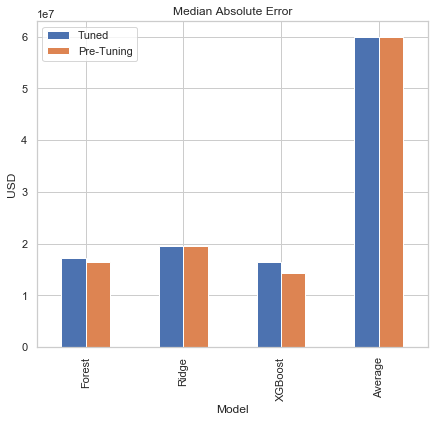

In [721]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [7, 6]

meme4DF.plot(kind='bar', x='Model')
plt.title('Median Absolute Error')
plt.ylabel('USD')

plt.show()

In [662]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [7, 6]

meme4DF.plot(kind='bar', x='Model')
plt.title('Median Absolute Error')
pl
plt.show()

,has_collection,popularity,runtime,big_prod_comp,eng_lan,has_tagline,release_year,num_genres,maj_country,director_success,...,Western,Thriller,Animation,Action,Mystery,Foreign,Science Fiction,Documentary,Family,culmative_workers_success
0,1,6.575393,93.0,1,1,1,2015,1,1,5.069332e+07,...,0,0,0,0,0,0,0,0,0,1.628596e+08
1,1,8.248895,113.0,1,1,1,2004,4,1,1.138730e+08,...,0,0,0,0,0,0,0,0,1,2.623432e+08
2,0,64.299990,105.0,0,1,1,2014,1,1,4.454357e+08,...,0,0,0,0,0,0,0,0,0,5.261091e+08
3,0,3.174936,122.0,0,0,0,2012,2,0,0.000000e+00,...,0,1,0,0,0,0,0,0,0,2.248000e+07
4,0,1.148070,118.0,0,0,0,2009,2,0,0.000000e+00,...,0,1,0,1,0,0,0,0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,9.853270,102.0,1,1,1,1994,2,1,4.661607e+07,...,0,0,0,0,0,0,0,0,0,6.805076e+07
2996,0,3.727996,102.0,0,0,0,2013,2,0,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0.000000e+00
2997,0,14.482345,120.0,1,1,1,1996,4,1,6.956010e+07,...,0,1,0,1,1,0,0,0,0,2.808159e+08
2998,0,15.725542,90.0,0,1,1,2004,2,1,0.000000e+00,...,0,0,0,0,0,0,0,0,0,2.003631e+08


In [663]:
train_panda_features.columns

Index(['has_collection', 'popularity', 'runtime', 'big_prod_comp', 'eng_lan',
       'has_tagline', 'release_year', 'num_genres', 'maj_country',
       'director_success', 'producer_success', 'actor1_success',
       'actor2_success', 'has_homepage', 'adjusted_budget', 'Drama',
       'Adventure', 'Fantasy', 'Western', 'Thriller', 'Animation', 'Action',
       'Mystery', 'Foreign', 'Science Fiction', 'Documentary', 'Family',
       'culmative_workers_success'],
      dtype='object')

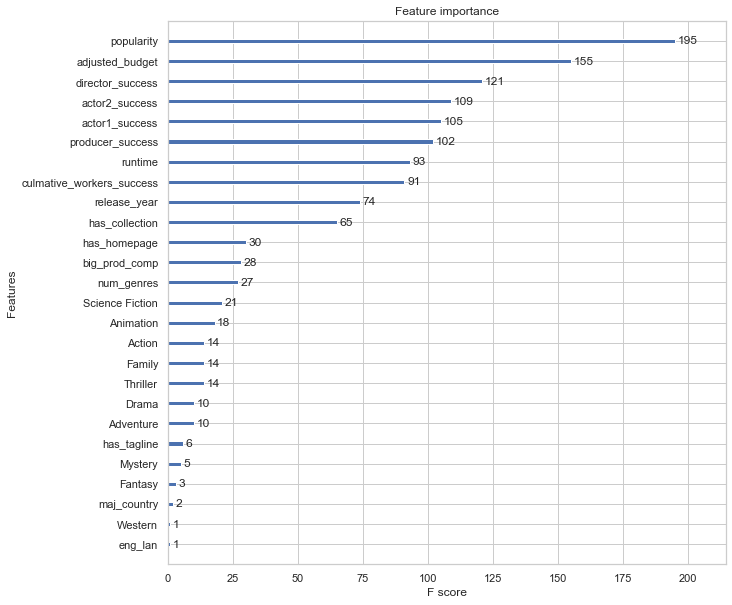

In [668]:
xgb.plot_importance(tuned_xgb.best_estimator_)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [722]:
errorsAdj = abs(preds - test_labels)

In [724]:
np.argsort(errors)

AttributeError: 'numpy.ndarray' object has no attribute 'top'

In [ ]:
a[:] = [x + 2 for x in a]


In [ ]:
def execute(vals):
    

In [725]:
train_panda_features.columns

Index(['has_collection', 'popularity', 'runtime', 'big_prod_comp', 'eng_lan',
       'has_tagline', 'release_year', 'num_genres', 'maj_country',
       'director_success', 'producer_success', 'actor1_success',
       'actor2_success', 'has_homepage', 'adjusted_budget', 'Drama',
       'Adventure', 'Fantasy', 'Western', 'Thriller', 'Animation', 'Action',
       'Mystery', 'Foreign', 'Science Fiction', 'Documentary', 'Family',
       'culmative_workers_success'],
      dtype='object')

In [726]:
sns.lmplot('has_collection','revenue', train_panda_features, fit_reg=False)

NameError: name 'trainpre' is not defined

In [727]:
sns.lmplot('popularity','revenue', train_panda_features, fit_reg=False)

NameError: name 'trainpre' is not defined

In [ ]:
sns.lmplot('director_success','revenue', train_panda_features, fit_reg=False)

In [ ]:
sns.lmplot('director_success','revenue', train_panda_features, fit_reg=False)

In [ ]:
sns.lmplot('director_success','revenue', train_panda_features, fit_reg=False)

In [ ]:
sns.lmplot('director_success','revenue', train_panda_features, fit_reg=False)

In [ ]:
sns.lmplot('director_success','revenue', train_panda_features, fit_reg=False)